In [5]:
from scipy.stats import binom
import sdm as sdmlib
import matplotlib.pyplot as plt

In [99]:
_phi_fn_cache = {}
def phi_fn(n, H, r, d, steps=500):
    key = (n, H, r, d, steps)
    if key in _phi_fn_cache:
        return _phi_fn_cache[key]
    v = []
    for _ in range(steps):
        bs1 = sdmlib.Bitstring.init_random(n)
        bs2 = bs1.copy()
        bs2.flip_random_bits(d)
        selected1 = address_space.scan_opencl2(bs1, r)
        selected2 = address_space.scan_opencl2(bs2, r)
        x = len(set(selected1) & set(selected2))
        v.append(x)
    mu = 1.0*sum(v)/len(v)
    _phi_fn_cache[key] = mu
    return mu

In [100]:
n = 1000
sample = 1000000
r = 451

address_space = sdmlib.AddressSpace.init_random(n, sample)
address_space.opencl_init()

0

In [101]:
training_set = 200
training_noise = 0.15
training_value = training_set*(1-2*training_noise)

In [102]:
training_shared

174.66

In [103]:
activated_hls = phi_fn(n, sample, r, 0, steps=200)

In [104]:
activated_hls = int(activated_hls+0.5)

In [110]:
x_values = range(40, 51)
y_values = []
for x in x_values:
    dist = int(x*n/100.0)
    shared = phi_fn(n, sample, r, dist, steps=250)
    shared = int(shared+0.5)
    print(x, training_value, shared, training_value*shared, activated_hls - shared)
    y = binom.cdf(training_value*shared, activated_hls - shared, 0.5)
    y_values.append(y)

40 140.0 7 980.0 1066
41 140.0 7 980.0 1066
42 140.0 5 700.0 1068
43 140.0 5 700.0 1068
44 140.0 4 560.0 1069
45 140.0 3 420.0 1070
46 140.0 3 420.0 1070
47 140.0 2 280.0 1071
48 140.0 2 280.0 1071
49 140.0 1 140.0 1072
50 140.0 1 140.0 1072


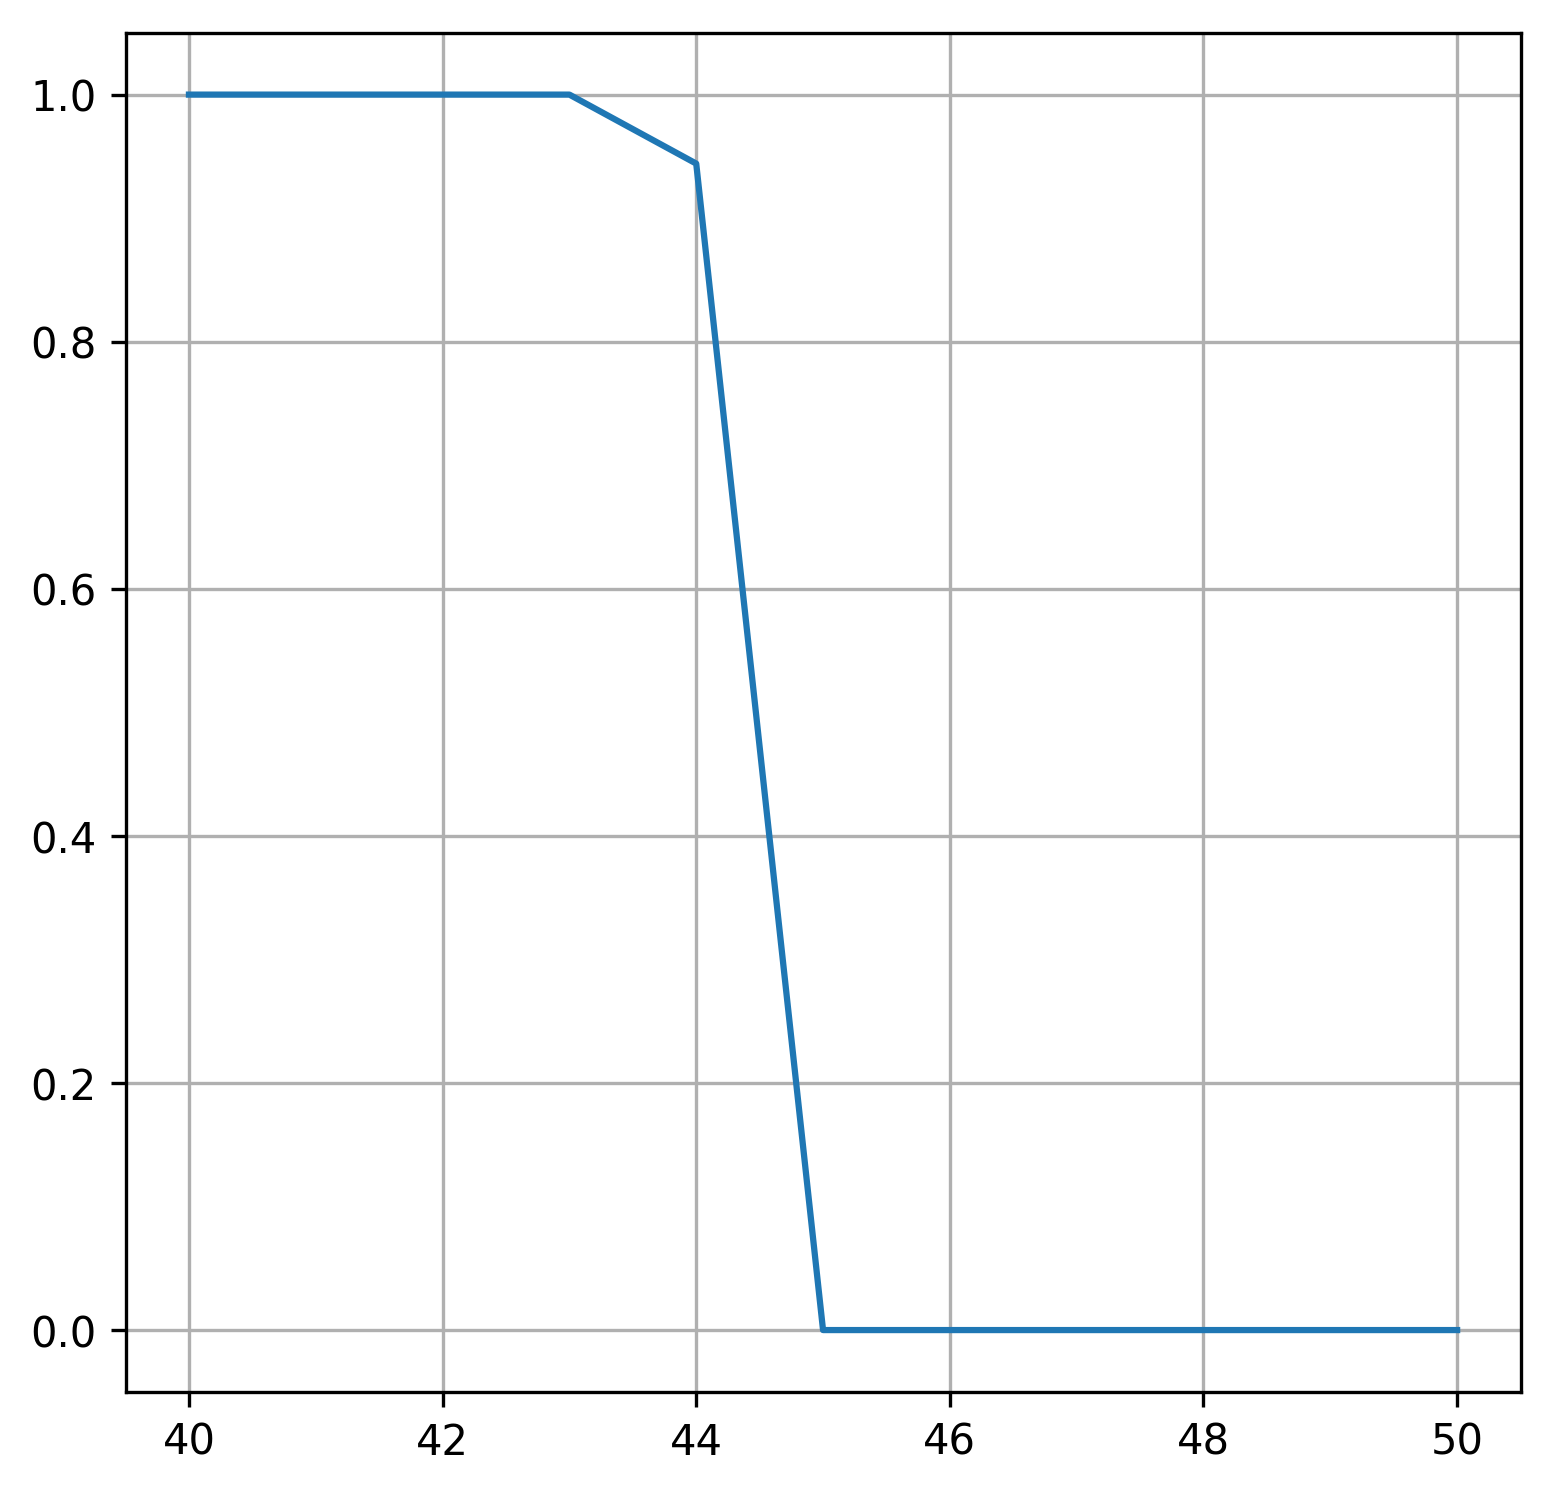

In [111]:
plt.figure(figsize=(6, 6), dpi=300)
plt.plot(x_values, y_values)
plt.grid()



In [21]:
y_values

[1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 0.07102207538289855,
 1.254463503866384e-33,
 1.254463503866384e-33,
 1.254463503866384e-33,
 5.389840597697583e-121,
 5.389840597697583e-121]